# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [130]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import metrics

from array import *

In [78]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('../datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [79]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [80]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [81]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [82]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [83]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

En días de trabajo se alquilan en promedio 193 biciclietas por hora, mientras en días que no son de trabajo se alquilan en promedio 188.

In [84]:
# mean rentals for each value of "hour"
G = bikes.groupby('hour').total.mean()
G
#G.plot()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Bicicletas alquiladas en promedio por hora del día

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

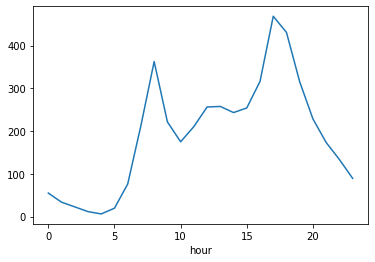

In [85]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

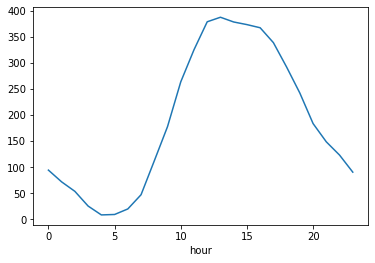

In [86]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

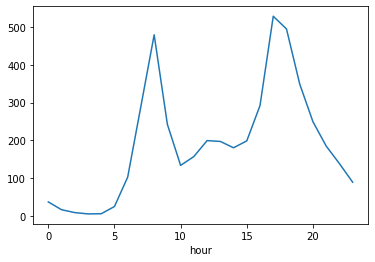

In [87]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

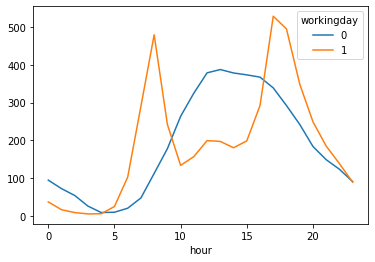

In [88]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

Se observa que en el caso de los días de trabajo los bicicletas son alquiladas en las franjas de la mañana (5 a 10) y posteriormente en una franja de la tarde noche (15 a 20), mientras tanto en los días que no son de trabajo se alquilan las bicicletas en horarios de la tarde en una franja larga de 10 a 18 aproximadamente

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [89]:
#n = {i: i for i in range(bikes.shape[0])}
#n = pd.DataFrame(n)
#round(bikes.shape[0]*0.8)
#hh =sample(round(bikes.shape[0]*0.8))

In [90]:
x_train, x_test, y_train, y_test = train_test_split(bikes[['hour', 'workingday']], bikes['total'], test_size=0.2, random_state=0)
#print(x_train.head())
#print(x_test.head())
#print(y_train.head())
#print(y_test.head())

# Todo dataset

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8708, 2)
(8708,)
(2178, 2)
(2178,)


In [91]:
# Selección train y test
#x = bikes[['hour', 'workingday']]
#y = bikes['total']

#x_train= x.sample(round(bikes.shape[0]*0.8))

In [92]:
# Train all the models
#x_train = bikes.drop(columns=['total'])
#x_train = bikes[['hour', 'workingday']]
#x_train.head()                   

In [93]:
#X_test = test.iloc[:, 1:]
#y_train = bikes['total']
#y_train.head()

#for model in models.keys():
#    models[model].fit(X_train, y_train)

            Coefficient
hour          10.474076
workingday     4.449523
Mean squared error: 28012.33
Coefficient of determination: 0.16


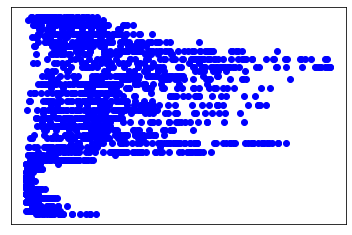

In [94]:
# Ajuste de regresión
regr = LinearRegression().fit(x_train,y_train)
y_pred = regr.predict(x_test)
#print(y_pred.shape)
#print(y_pred)

# The coefficients
#print('Coefficients: \n', regr.coef_)
coeff_df = pd.DataFrame(regr.coef_, x_train.columns, columns=['Coefficient'])  
print(coeff_df)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
#plt.scatter(x_test, y_test,  color='black')
plt.scatter(y_test, y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

Los coeficientes obtenidos son para hour $10.474$ y para workingday $4,449$. El coeficiente de workingday nos indicaría que si es un día de trabajo se alquilan $4,449$ bicicletas mpas en promedio, sin embargo el coeficiente de hour se esta tomando como continuo y nos indicaría una relación entre la hora del día y la cantidad de bicicletas alquiladas y esta relación no es lineal pues en los casos de día de trabajo hay unos picos en la mañana y otros en la tarde. Lo mpas adecuado es convertir la variable de hora del día en una variable categorica.
Adicionalmente este modelo nos esta generando un r<sup>2</sup> = 0.16

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [95]:
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
# solo categoricas - (suma residuos al cuadrado)

In [96]:
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [97]:
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [98]:
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [99]:
tree = tree_grow(x_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)

In [100]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted    

In [101]:
y_predtree = tree_predict(x_test, tree)
#y_predtree
y_predtree1 = y_predtree.tolist()
#num_list

Mean squared error: 70647.66
Coefficient of determination: -1.13


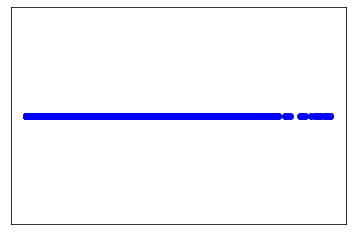

In [102]:
# Error tree (Revisar)

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predtree1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predtree1))

# Plot outputs
#plt.scatter(x_test, y_test,  color='black')
plt.scatter(y_test, y_predtree1, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [103]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy').mean())


C:\Users\Laboratorios FICB\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Laboratorios FICB\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Laboratorios FICB\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Laboratorios FICB\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\Laboratorios FICB\anaconda3\lib\site-packag

Text(0, 0.5, 'Accuracy')

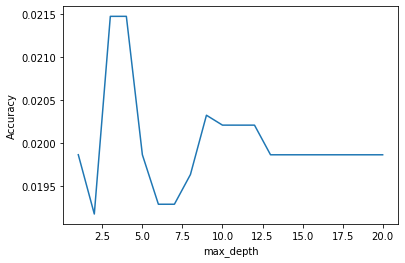

In [104]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [105]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.02147458991514576, 4)

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [106]:
df = pd.read_csv('../datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [107]:
df.shape

(6000, 61)

In [108]:
x1 = df.drop(['url', 'Popular'], axis=1)
y1 = df['Popular']

In [109]:
x1.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,2.0,...,0.470000,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8
1,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,0.0,...,0.342778,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1
2,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,0.0,...,0.516263,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0
3,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,0.0,...,0.436654,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0
4,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,0.0,...,0.346429,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0


In [110]:
y.mean()

0.5

In [119]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Popular, dtype: int64

In [111]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [112]:
 # list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

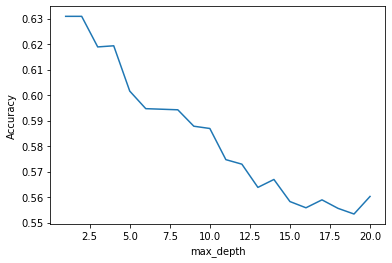

In [113]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [114]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [124]:
# árbol de decisión - ajustado
clf = DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [125]:
# predicción con árbol ajustado
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [128]:
# calculo del F1 score, binary por tipo de respuesta
F1tree = f1_score(y_test, y_pred, average='binary')
F1tree

0.5402144772117962

In [131]:
# DEterminación accuracy del árbol
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5426666666666666


In [134]:
#for depth in max_depth_range:
dlf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(dlf.score(X_train, y_train))
y_predLR= dlf.predict(X_test)
y_predLR

0.6126666666666667


C:\Users\Laboratorios FICB\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [135]:
# calculo del F1 score, binary por tipo de respuesta
F1LR = f1_score(y_test, y_predLR, average='binary')
F1LR

0.6096904441453566

In [136]:
# DEterminación accuracy del árbol
print("Accuracy:",metrics.accuracy_score(y_test, y_predLR))

Accuracy: 0.6133333333333333


# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [274]:
# Estimación 100 arboles con profundidad none
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
ntree = 100
y_pred1LN = pd.DataFrame(index = X_test.index , columns=[list(range(ntree))])
y_pred1L2 = pd.DataFrame(index = X_test.index , columns=[list(range(ntree))])
y_pred1LR = pd.DataFrame(index = X_test.index , columns=[list(range(ntree))])
#y_pred1LR = pd.DataFrame(index = [list(range(y_test.shape[0]))] , columns=[list(range(ntree))])
y_pred1LR.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
# create ten bootstrap samples (will be used to select rows from the DataFrame)
# set a seed for reproducibility
np.random.seed(123)
n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, (3*ntree) + 1)]
#samples

In [276]:
for i in range(ntree):
    X_trainL = X_train.iloc[samples[i]]
    y_trainL = y_train.iloc[samples[i]]
    #print(y_trainL)
    clf1 = DecisionTreeClassifier(max_depth=None, random_state=1, splitter='random')
    clf1 = clf.fit(X_trainL,y_trainL)
    y_pred1LN[i,] = clf1.predict(X_test)

y_pred1LN.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,0,0,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,0,1,1,1,0,1,0,1,1,0,...,1,0,1,1,0,1,1,1,1,0
2520,1,1,0,1,1,1,1,1,0,0,...,1,0,1,1,1,0,1,0,0,1
3721,1,0,1,0,1,0,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
3727,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [277]:
for i in range(ntree):
    X_trainL = X_train.iloc[samples[i+ntree]]
    y_trainL = y_train.iloc[samples[i+ntree]]
    #print(y_trainL)
    clf1 = DecisionTreeClassifier(max_depth=2, random_state=1, splitter='random')
    clf1 = clf.fit(X_trainL,y_trainL)
    y_pred1L2[i,] = clf1.predict(X_test)

y_pred1L2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1
2185,1,0,1,0,0,0,1,1,1,0,...,0,0,1,1,1,0,0,0,1,0
2520,1,1,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,1,1,1,1
3721,1,0,1,0,1,0,1,1,1,0,...,1,0,1,1,1,0,1,0,1,0
3727,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,1,0,0,1,1


In [278]:
for i in range (ntree):
    X_trainL = X_train.iloc[samples[i+(2*ntree)]]
    #print(X_trainL)
    y_trainL = y_train.iloc[samples[i+(2*ntree)]]
    #print(y_trainL)
    dlf = LogisticRegression(random_state=0, max_iter=100000).fit(X_trainL, y_trainL)
    y_pred1LR[i,]= dlf.predict(X_test)

y_pred1LR.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [272]:
#Conteo de casos
y_predT = y_pred1LN.sum(axis=1) + y_pred1L2.sum(axis=1) + y_pred1LR.sum(axis=1)

#print(y_pred1LN.sum(axis=1))
#print(y_pred1L2.sum(axis=1))
#print(y_pred1LR.sum(axis=1))

In [272]:
y_pred = (y_predT >= (n)).astype(np.int)

1483    82
2185    61
2520    55
3721    75
3727    19
        ..
3077    54
5166    36
2227    51
5684    43
1937    32
Length: 1500, dtype: int64
1483    76
2185    69
2520    53
3721    70
3727    23
        ..
3077    49
5166    24
2227    56
5684    39
1937    35
Length: 1500, dtype: int64
1483    100
2185    100
2520    100
3721    100
3727      0
       ... 
3077      0
5166      0
2227    100
5684      0
1937      0
Length: 1500, dtype: int64


# Exercise 7.9

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score